In [48]:
import pandas as pd
df = pd.read_csv('df_actions.csv')
def label_action(x):
    if x <= -98:
        return 'close'
    elif x < 0:
        return 'reduce'
    elif x == 100 or x > 300:
        return 'open'
    elif x > -0.1 and x < 0.1:
        return 'derisk'
    return 'add'

df['action_type'] = df['debt_change_pct'].apply(label_action)
df.loc[df['action_type'] == 'open', 'debt_change_pct'] = 100

df.columns

Index(['userStateSnapshotId', 'user', 'activeBand', 'collateral', 'stablecoin',
       'oraclePrice', 'collateralUsd', 'collateralUp', 'depositedCollateral',
       'debt', 'n', 'n1', 'n2', 'health', 'loss', 'lossPct', 'softLiq',
       'timestamp', 'marketId', 'collateral.1', 'collateralName',
       'debt_change', 'debt_change_pct', 'rate', 'action_type'],
      dtype='object')

In [36]:
pd.option_context('display.height', 500, 'display.max_rows', 500)

In [49]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.sort_values(by=['user', 'marketId', 'timestamp'], inplace=True)

In [50]:
def assign_position_id(group):
    global global_position_id
    open_position = False  
    current_position_id = None  

    for i, row in group.iterrows():
        if row['action_type'] == 'open' and not open_position:
            open_position = True
            global_position_id += 1
            current_position_id = global_position_id
        
        if open_position:
            group.at[i, 'position_id'] = current_position_id

        if row['action_type'] == 'close':
            open_position = False
            group.at[i, 'position_id'] = current_position_id

    return group

global_position_id = 0
df = df.groupby(['user', 'marketId'], group_keys=False).apply(assign_position_id)


In [43]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 50)

df

,userStateSnapshotId,user,activeBand,collateral,stablecoin,oraclePrice,collateralUsd,collateralUp,depositedCollateral,debt,...,softLiq,timestamp,marketId,collateral.1,collateralName,debt_change,debt_change_pct,rate,action_type,position_id
2657,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-169...,0x0027c200949943a923762f737763aec83f701c79,8.0,20.000000,0.000000,1904.921927,38098.438547,20.000000,20.000000,32636.038216,...,False,2023-08-18 04:04:47,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,32636.038216,100.000000,0.000991,open,1.0
3245,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-169...,0x0027c200949943a923762f737763aec83f701c79,11.0,19.887191,0.000000,1876.570376,37319.714108,19.887191,20.000000,32466.332249,...,False,2023-08-28 12:32:23,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,-183.587763,-0.562292,0.025121,reduce,1.0
3568,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-169...,0x0027c200949943a923762f737763aec83f701c79,11.0,19.782302,0.000000,1857.979001,36755.101651,19.782302,20.000000,29294.571503,...,False,2023-09-05 12:26:47,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,-3200.666308,-9.849647,0.047287,reduce,1.0
4972,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-169...,0x0027c200949943a923762f737763aec83f701c79,2.0,10.752858,14508.113069,2039.915753,21934.924280,17.761880,20.000000,32916.638523,...,True,2023-10-24 16:00:35,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,3401.067682,11.522961,0.082202,add,1.0
5033,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-169...,0x0027c200949943a923762f737763aec83f701c79,2.0,10.940115,13962.902925,2045.305699,22375.879458,17.691932,20.000000,29519.945761,...,True,2023-10-25 04:00:35,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,-3398.019724,-10.322691,0.080861,reduce,1.0
6167,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-169...,0x0027c200949943a923762f737763aec83f701c79,-7.0,18.017929,0.000000,2302.872715,41492.996223,18.017929,21.340000,35658.060074,...,False,2023-11-09 20:07:35,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,6051.040098,20.437856,0.070400,add,1.0
6312,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-169...,0x0027c200949943a923762f737763aec83f701c79,-14.0,23.017929,0.000000,2406.577967,55394.439883,23.017929,26.340000,48391.074861,...,False,2023-11-10 12:09:35,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,12729.549045,35.695469,0.075397,add,1.0
6410,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-169...,0x0027c200949943a923762f737763aec83f701c79,-11.0,14.577920,19804.912800,2342.603579,34150.287874,22.954917,26.340000,43496.737050,...,True,2023-11-11 04:54:11,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,-4897.478043,-10.119966,0.075396,reduce,1.0
722,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-168...,0x002c2bd39ba80cf12c761edae0c949f8ba21e76b,-4.0,0.969680,0.000000,2142.672113,2077.706068,0.969680,0.969680,1827.012156,...,False,2023-06-23 20:08:35,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,1827.012156,100.000000,0.093197,open,2.0
746,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-168...,0x002c2bd39ba80cf12c761edae0c949f8ba21e76b,-3.0,0.875523,197.273844,2140.164084,1873.762882,0.966830,0.969680,1797.607915,...,True,2023-06-25 04:19:59,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,-29.848148,-1.633317,0.092606,reduce,2.0


In [ ]:
import numpy as np
median_debt_change_per_market = df.groupby('marketId')['debt_change'].median().reset_index()
median_debt_change_per_market.rename(columns={'debt_change': 'median_debt_change'}, inplace=True)
df = df.merge(median_debt_change_per_market, on='marketId', how='left')
df['scaled_debt_change'] = df['debt_change'] / df['median_debt_change']
df['scaled_debt_change'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['scaled_debt_change'].fillna(0, inplace=True)

# Influence of rate variations on user actions

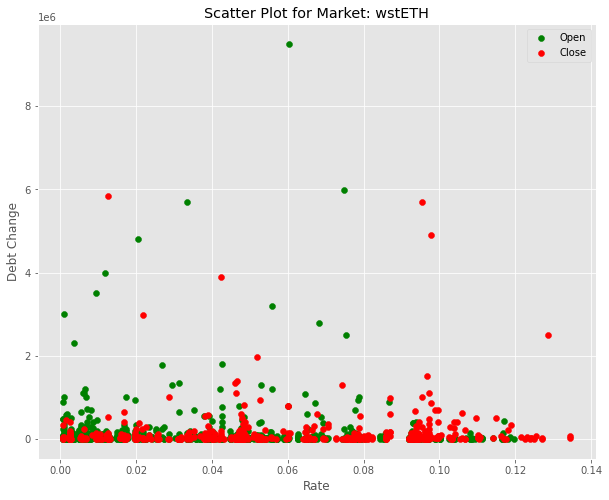

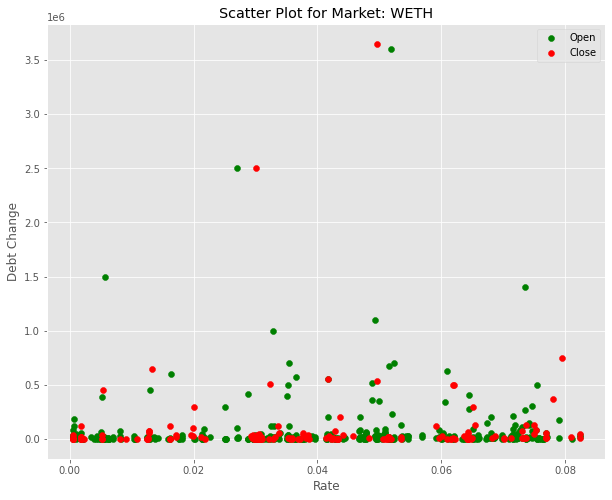

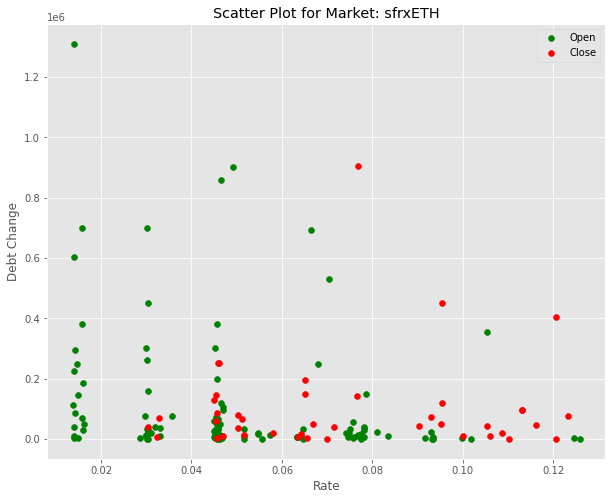

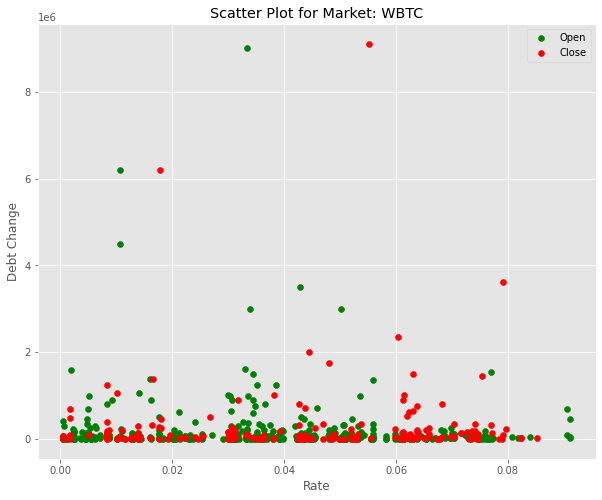

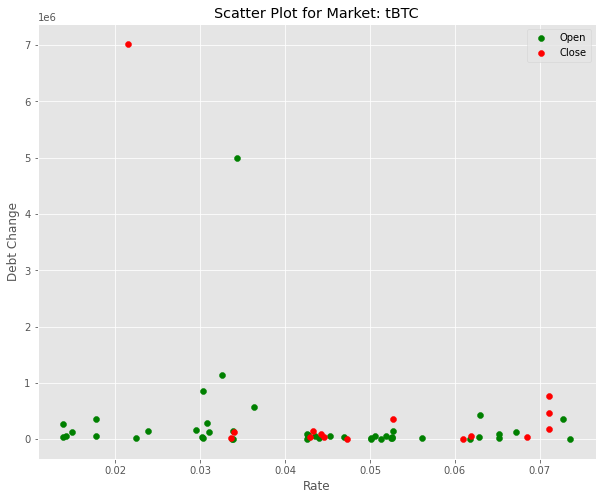

In [63]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

filtered_df = df[df['action_type'].isin(['open', 'close'])]
markets = filtered_df['marketId'].unique()

for market in markets:
    plt.figure(figsize=(10, 8))
    market_data = filtered_df[filtered_df['marketId'] == market]
    market_handle = market_data['collateralName'].iloc[0]

    open_data = market_data[market_data['action_type'] == 'open']
    plt.scatter(open_data['rate'], open_data['debt_change'], color='green', label='Open')

    close_data = market_data[market_data['action_type'] == 'close']
    plt.scatter(close_data['rate'], close_data['debt_change'].abs(), color='red', label='Close')

    plt.xlabel('Rate')
    plt.ylabel('Debt Change')
    plt.title(f'Scatter Plot for Market: {market_handle}')
    plt.legend()

    plt.show()

In [69]:
import numpy as np

bins = np.linspace(df['rate'].min(), df['rate'].max(), num=10)
df['rate_bin'] = pd.cut(df['rate'], bins)

def calculate_avg_debt_change(group):
    avg_open = group[group['action_type'] == 'open']['debt_change'].sum()
    avg_close = group[group['action_type'] == 'close']['debt_change'].sum()
    return pd.Series({'avg_open_debt_change': avg_open, 'avg_close_debt_change': avg_close})

avg_debt_change_by_rate = df.groupby(['marketId', 'rate_bin']).apply(calculate_avg_debt_change).reset_index()


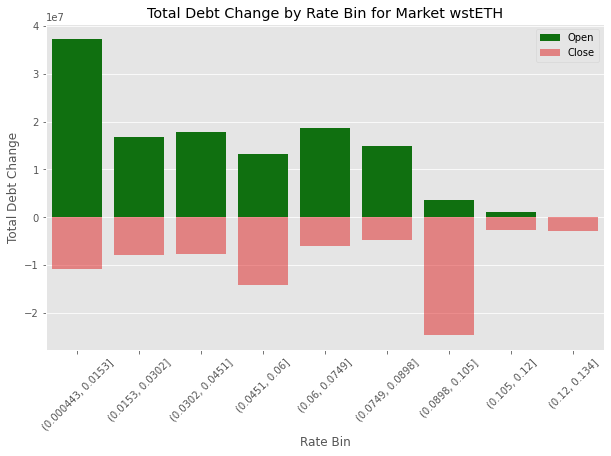

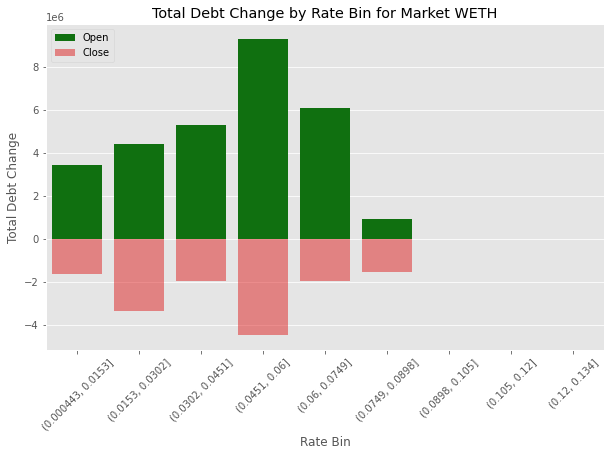

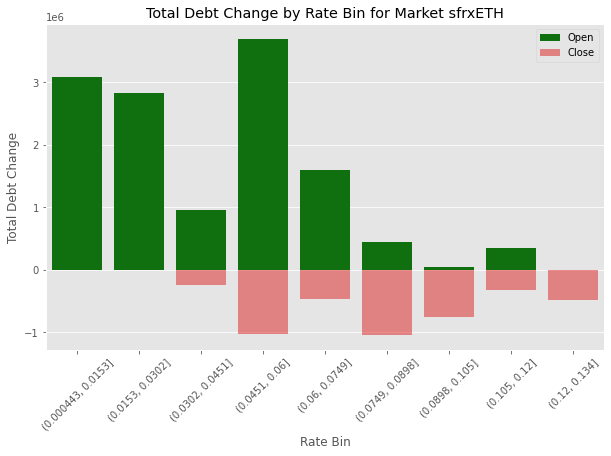

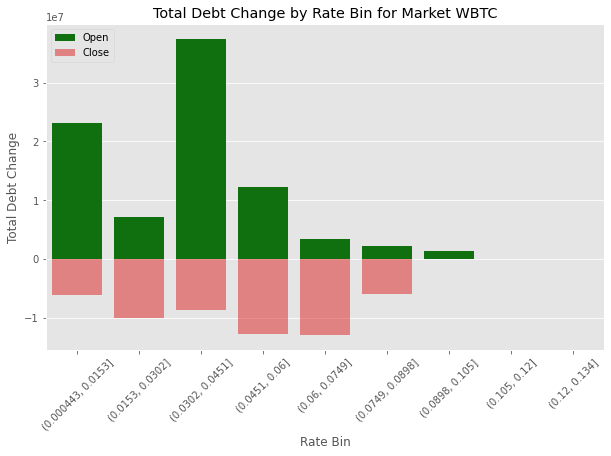

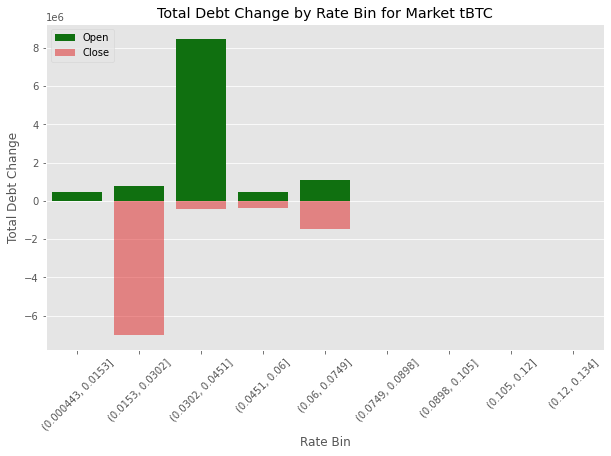

In [73]:
import seaborn as sns

for market in df['marketId'].unique():
    market_data = avg_debt_change_by_rate[avg_debt_change_by_rate['marketId'] == market]
    market_handle = filtered_df[filtered_df['marketId'] == market]['collateralName'].iloc[0]

    plt.figure(figsize=(10, 6))
    sns.barplot(x='rate_bin', y='avg_open_debt_change', data=market_data, color='green', label='Open')
    sns.barplot(x='rate_bin', y='avg_close_debt_change', data=market_data, color='red', alpha=0.5, label='Close')
    plt.xticks(rotation=45)
    plt.title(f'Total Debt Change by Rate Bin for Market {market_handle}')
    plt.ylabel('Total Debt Change')
    plt.xlabel('Rate Bin')
    plt.legend()
    plt.show()


In [74]:
def calculate_position_duration(group):
    open_time = group[group['action_type'] == 'open']['timestamp'].min()
    if 'close' in group['action_type'].values:
        close_time = group[group['action_type'] == 'close']['timestamp'].min()
    else:
        close_time = pd.Timestamp.now()
    return close_time - open_time

df['timestamp'] = pd.to_datetime(df['timestamp'])
position_durations = df.groupby('position_id').apply(calculate_position_duration)
df['position_duration'] = df['position_id'].map(position_durations)

In [75]:
closed_positions = df[df['action_type'] == 'close']
open_rates = df[df['action_type'] == 'open'].groupby('position_id')['rate'].first()
closed_positions = closed_positions.set_index('position_id').join(open_rates.rename('open_rate'))
closed_positions['rate_delta'] = closed_positions['rate'] - closed_positions['open_rate']

<AxesSubplot:title={'center':'Number of positions that closed at a higher rate than they opened'}, xlabel='collateralName'>

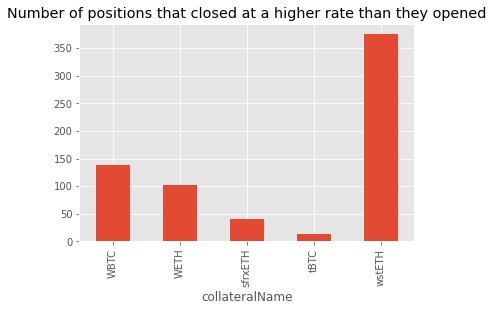

In [80]:
higher_close_count = closed_positions[closed_positions['rate_delta'] > 0].groupby('collateralName').size()
higher_close_count.plot.bar(title='Number of positions that closed at a higher rate than they opened')

<AxesSubplot:title={'center':'Number of positions that closed at a lower rate than they opened'}, xlabel='collateralName'>

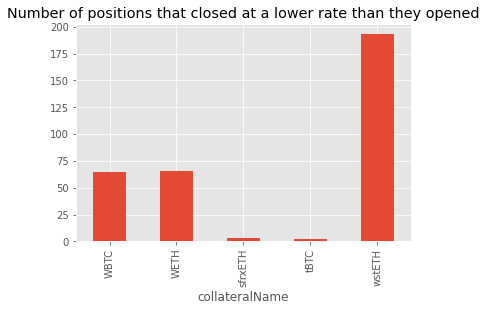

In [81]:
lower_close_count = closed_positions[closed_positions['rate_delta'] < 0].groupby('collateralName').size()
lower_close_count.plot.bar(title='Number of positions that closed at a lower rate than they opened')

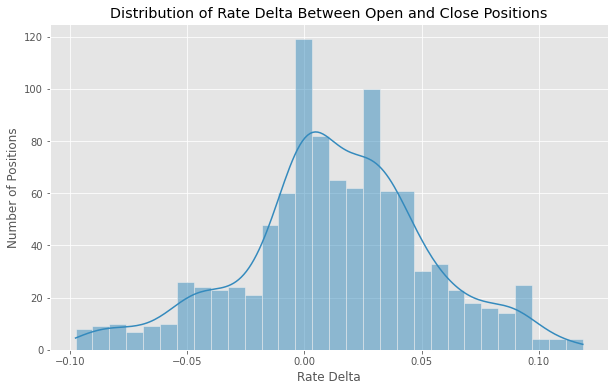

In [82]:
plt.figure(figsize=(10, 6))
sns.histplot(closed_positions['rate_delta'], bins=30, kde=True)
plt.title('Distribution of Rate Delta Between Open and Close Positions')
plt.xlabel('Rate Delta')
plt.ylabel('Number of Positions')
plt.show()

In [86]:
closed_positions = df[df['action_type'] == 'close'][['position_id', 'marketId', 'rate', 'debt_change']]

open_rates = df[df['action_type'] == 'open'].groupby('position_id')['rate'].first()

closed_positions = closed_positions.set_index('position_id').join(open_rates.rename('open_rate'))

closed_positions['rate_delta'] = closed_positions['rate'] - closed_positions['open_rate']


In [100]:
closed_positions['rate_delta'].describe()

count    1000.000000
mean        0.013143
std         0.039641
min        -0.097583
25%        -0.006519
50%         0.012791
75%         0.037233
max         0.118798
Name: rate_delta, dtype: float64

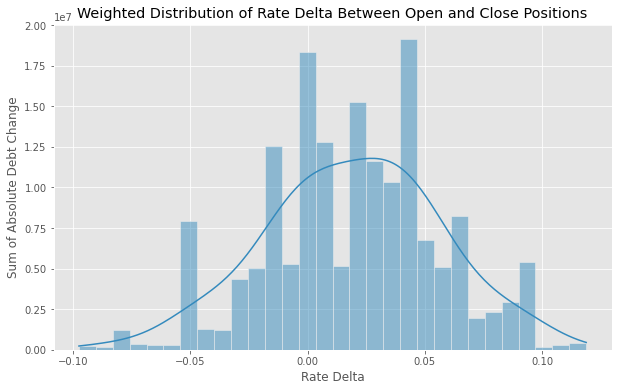

In [96]:
plot_data = closed_positions[['rate_delta', 'debt_change']].dropna()
plt.figure(figsize=(10, 6))
sns.histplot(data=plot_data, x='rate_delta', 
             weights=plot_data['debt_change'].abs(), 
             bins=30, kde=True)
plt.title('Weighted Distribution of Rate Delta Between Open and Close Positions')
plt.xlabel('Rate Delta')
plt.ylabel('Sum of Absolute Debt Change')
plt.show()

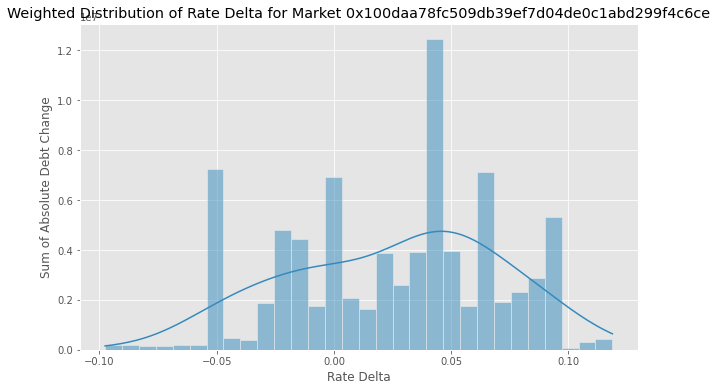

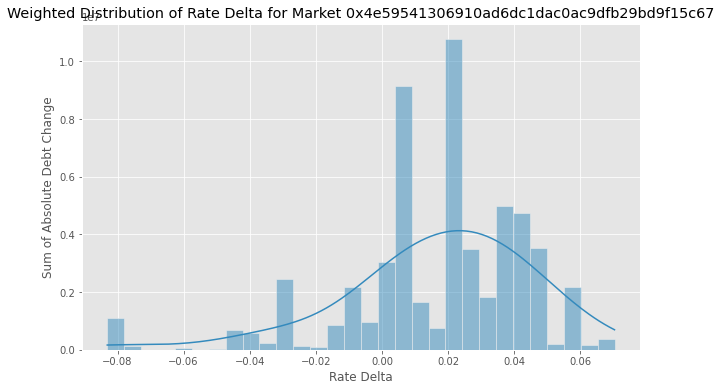

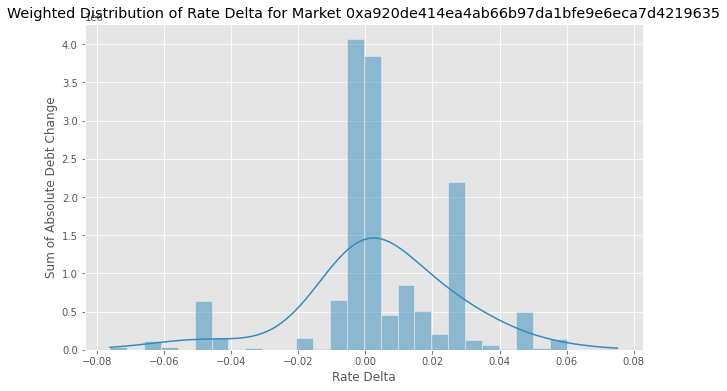

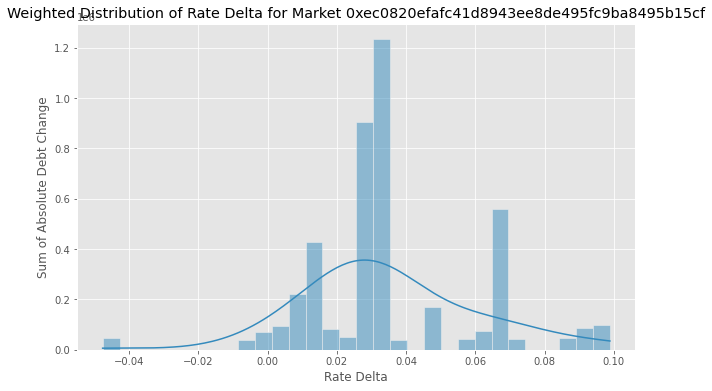

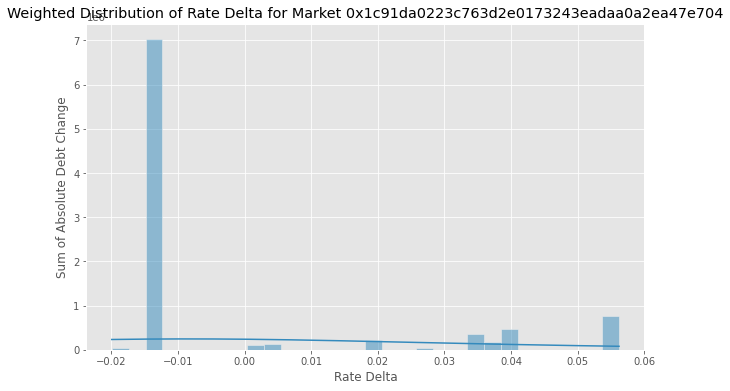

In [88]:
closed_positions.reset_index(inplace=True)

# Get unique markets
markets = closed_positions['marketId'].unique()

# Plot distribution for each market
for market in markets:
    market_data = closed_positions[closed_positions['marketId'] == market]
    
    plt.figure(figsize=(10, 6))
    sns.histplot(x=market_data['rate_delta'], 
                 weights=market_data['debt_change'].abs(), 
                 bins=30, kde=True)
    
    plt.title(f'Weighted Distribution of Rate Delta for Market {market}')
    plt.xlabel('Rate Delta')
    plt.ylabel('Sum of Absolute Debt Change')
    plt.show()

## Loan sensitivity to rates by size

In [113]:
opening_scaled_debt_change = df[df['action_type'] == 'open'].groupby('position_id')['scaled_debt_change'].first()
large_loan_threshold = opening_scaled_debt_change.quantile(0.75)
small_loan_threshold = opening_scaled_debt_change.median()

position_size_labels = opening_scaled_debt_change.apply(lambda x: 'large' if x >= large_loan_threshold else ('small' if x <= small_loan_threshold else 'medium'))
df['loan_size'] = df['position_id'].map(position_size_labels)

open_rates = df[df['action_type'] == 'open'][['position_id', 'rate']].set_index('position_id')
closed_loans = df[df['action_type'] == 'close'].set_index('position_id')
closed_loans = closed_loans.join(open_rates.rename(columns={'rate': 'open_rate'}))
closed_loans['rate_change'] = closed_loans['rate'] - closed_loans['open_rate']

from scipy.stats import ttest_ind
large_loans = closed_loans[closed_loans['loan_size'] == 'large']
small_loans = closed_loans[closed_loans['loan_size'] == 'small']
t_stat, p_value = ttest_ind(large_loans['rate_change'], small_loans['rate_change'], nan_policy='omit')
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: 5.920822021646604, P-Value: 4.784564514281576e-09


## Loan length by size

In [116]:
df.groupby(['loan_size'])['position_duration'].mean()

loan_size
large    71 days 23:58:34.878748382
medium   66 days 18:42:26.842454746
small    65 days 17:38:54.877732299
Name: position_duration, dtype: timedelta64[ns]

In [119]:
large_loans_duration = df[df['loan_size'] == 'large']['position_duration']
small_loans_duration = df[df['loan_size'] == 'small']['position_duration']

large_loans_seconds = large_loans_duration.dt.total_seconds()
small_loans_seconds = small_loans_duration.dt.total_seconds()

t_stat, p_value = ttest_ind(large_loans_seconds, small_loans_seconds, nan_policy='omit', equal_var=False)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: 4.491161414426537, P-Value: 7.2385422225572675e-06


## Risky users

In [122]:
market_rate_stats = df.groupby('marketId')['rate'].agg(['mean', 'std']).rename(columns={'mean': 'rate_mean', 'std': 'rate_std'})
market_debt_stats = df.groupby('marketId')['scaled_debt_change'].agg(['mean', 'std']).rename(columns={'mean': 'debt_mean', 'std': 'debt_std'})
df = df.merge(market_rate_stats, on='marketId', how='left')
df = df.merge(market_debt_stats, on='marketId', how='left')
risky_users = df[
    (df['action_type'] == 'open') & 
    (df['rate'] > df['rate_mean'] + df['rate_std']) & 
    (df['scaled_debt_change'] > df['debt_mean'] + df['debt_std'])
]['user'].unique()


In [123]:
risky_users

array(['0x07cb1b3a52faf636a52822d918b07d30b0914d76',
       '0x488b99c4a94bb0027791e8e0eeb421187ec9a487',
       '0x59ccc4039f832996d0cf47d75bbe33ecd00ef2a7',
       '0x5ad9fec493e4e8544c1dd7b203855915eba1e12f',
       '0x9047391ab36600b3d41ccf787328e710b6aa570d',
       '0xac01ec664c1062234a73574d44523c906a3a6369',
       '0xc72aed14386158960d0e93fecb83642e68482e4b',
       '0xf9a2fa22cb7df26e3a10622c696f37fc345c6239',
       '0xfa4fc4ec2f81a4897743c5b4f45907c02ce06199'], dtype=object)

In [125]:
df[df['user'].isin(risky_users)].describe()

,activeBand,collateral,stablecoin,oraclePrice,collateralUsd,collateralUp,depositedCollateral,debt,n,n1,...,position_id,median_debt_change,scaled_debt_change,position_duration,mean,std,rate_mean,rate_std,debt_mean,debt_std
count,47.000000,52.000000,52.000000,52.000000,4.700000e+01,47.000000,47.000000,5.200000e+01,47.000000,47.000000,...,52.000000,52.000000,52.000000,52,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,-4.553191,1141.999503,3600.956632,6412.092947,3.170576e+06,1265.439971,1197.108912,1.970612e+06,11.021277,12.829787,...,886.923077,2373.734964,394.690029,50 days 01:17:59.996544596,0.049874,0.026202,0.049874,0.026202,14.625896,300.266134
std,7.700391,2189.381822,22507.059767,10388.209508,4.912810e+06,2270.347846,2196.239884,3.316003e+06,10.614775,23.142582,...,666.986105,1944.395505,3724.852511,53 days 15:03:12.678277897,0.007149,0.005104,0.007149,0.005104,7.681544,264.368949
min,-24.000000,0.000000,0.000000,1592.693019,2.608785e-01,0.000123,0.000000,0.000000e+00,4.000000,-23.000000,...,74.000000,649.090378,-15867.436712,3 days 20:06:12,0.043213,0.021095,0.043213,0.021095,5.661006,35.042851
25%,-8.000000,40.621383,0.000000,2034.630335,2.251307e+05,65.717484,65.299963,8.859763e+04,7.000000,-4.000000,...,543.000000,649.090378,-2.677895,10 days 01:05:17.506927,0.043624,0.021467,0.043624,0.021467,6.923896,103.609525
50%,-5.000000,175.753869,0.000000,2112.886018,1.439726e+06,271.000000,271.000000,8.000147e+05,10.000000,6.000000,...,667.000000,1510.888988,25.427680,32 days 01:35:30.910853,0.052327,0.026914,0.052327,0.026914,12.471436,156.972373
75%,0.000000,773.004402,0.000000,2270.731379,3.250352e+06,787.044624,773.004402,2.037770e+06,10.000000,21.000000,...,1386.500000,4567.726080,633.384826,59 days 03:32:12,0.052327,0.032589,0.052327,0.032589,24.496060,655.613709
max,15.000000,10203.319131,161161.650104,37341.766238,2.227291e+07,10203.319131,10203.319131,1.610836e+07,50.000000,107.000000,...,1975.000000,5502.629989,14635.934864,159 days 17:42:43.269768,0.062695,0.032589,0.062695,0.032589,24.496060,655.613709


## Conclusions

- Users predominantly close their loan at a higher rate than at which they opened it
- Higher rates lead to more loan closures
- On average the difference between closing rate and opening rate is just 1 point, but 25% of loans are closed at a right 3.7 points or higher than the opening rate
- Large positions (defined as those in the 75th percentile) seem more resilient to rate hikes than small positions.
- Large positions are opened for longer than small positions
- Risky users are few and have short position durations